Usando a base de dados da [Pesquisa Nacional de Saúde do Escolar - PeNSE](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html) do IBGE.  
Base de dados: [PENSE_2015_AMOSTRA2](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/).

# Importação dos dados

In [1]:
# imports
import numpy as np
import pandas as pd
from zipfile import ZipFile
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# faz download do dataset
url = 'https://github.com/LucasGabrielB/Alura-Bootcamp-Data-Science-Aplicada/raw/main/Modulo-03/datasets/PeNSE_2015_AMOSTRA2.zip'

req = requests.get(url)
zip_file = ZipFile(io.BytesIO(req.content))
zip_file.extractall("datasets")

In [3]:
df = pd.read_csv('/content/datasets/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV', sep=';', decimal=',')

df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [4]:
df.shape

(16556, 181)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


# Analisando os dados

## Intervalo de confiança

Teste Z é um teste estatístico usado para inferência, capaz de determinar se a diferença entre a média da amostra e da população é grande o suficiente para ser significativa estatisticamente.

In [6]:
from statsmodels.stats.weightstats import zconfint

zconfint(df['VB17004'].to_list())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(160.5556082427712, 160.87061789880892)

In [7]:
from statsmodels.stats.weightstats import DescrStatsW

descrStatsW = DescrStatsW(df['VB17004'])
descrStatsW.tconfint_mean()

(160.55559672649298, 160.8706294150872)

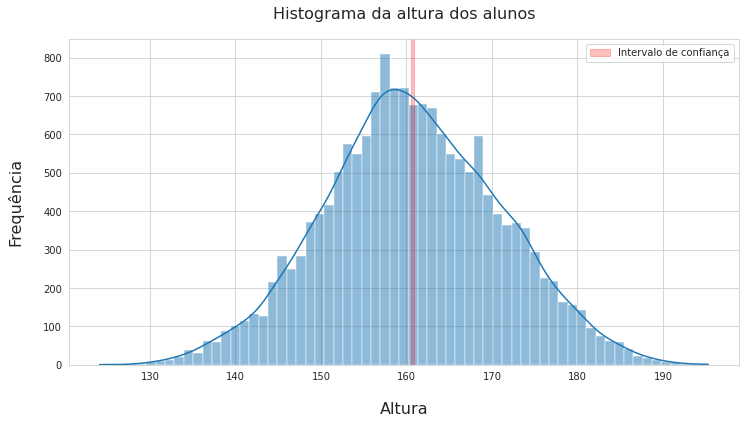

In [8]:
ax = sns.histplot(df['VB17004'], kde=True)
ax.figure.set_size_inches(12, 6)
ax.axvspan(*descrStatsW.tconfint_mean(), alpha=0.25,
           color='red', label='Intervalo de confiança')
ax.legend()
plt.xlabel('Altura', fontsize=16, labelpad=20)
plt.ylabel('Frequência', fontsize=16, labelpad=20)
plt.title('Histograma da altura dos alunos', fontsize=16, pad=20)

plt.show()

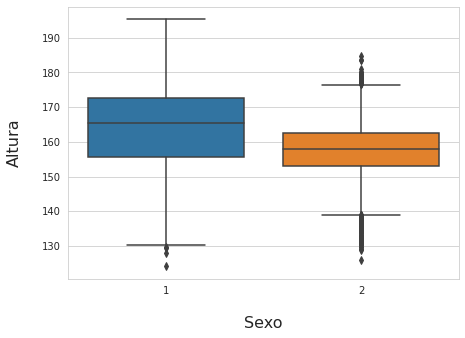

In [9]:
ax = sns.boxplot(data=df, x='VB01001', y='VB17004')
ax.figure.set_size_inches(7, 5)
plt.ylabel('Altura', fontsize=16, labelpad=20)
plt.xlabel('Sexo', fontsize=16, labelpad=20)

plt.show()

In [10]:
from statsmodels.stats.weightstats import ztest

male_heights = df.query('VB01001 == 1')['VB17004']
famale_heights = df.query('VB01001 == 2')['VB17004']

p_value = ztest(male_heights, famale_heights)[1]
p_value

0.0

In [11]:
from scipy.stats import normaltest

normaltest(male_heights)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [12]:
normaltest(famale_heights)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

In [13]:
from scipy.stats import ranksums

ranksums(male_heights, famale_heights)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)